In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
%matplotlib inline

In [13]:
# Build Q1, Q2, Q3 functions

def load_Q(path,dim="1d"):
    data = open(path,"r")
    parsed = []
    if (dim == "1d"):
        for line in data:
            parsed.append(np.array(line.split()).astype(float))
        return np.array(parsed)[:,0]
    elif (dim == "2d"):
        for row in data:
            cols = row.split()
            row_parsed = []
            for col in cols:
                row_parsed.append(float(col))
            row_parsed = np.array(row_parsed)
            parsed.append(row_parsed)
        return np.array(parsed)
    else:
        print "Error! dim has to equal \"1d\" or \"2d\"!"

Q1_path = "../tables/Q1_1d_a0.2_p0.0_g1.0_np30_ng10000.txt"
Q2_path = "../tables/Q2_1d_a0.2_p0.0_g1.0_np30_ng10000.txt"
Q3_path = "../tables/Q3_1d_a0.2_p0.0_g1.0_np30_ng10000.txt"
Q1_parsed = load_Q(Q1_path)
Q2_parsed = load_Q(Q2_path)
Q3_parsed = load_Q(Q3_path)

s_arr = np.logspace(0,np.log10(11),30) - 1
Q1_func = interp1d(s_arr,np.log10(-Q1_parsed + 1e-30),fill_value='extrapolate')
Q2_func = interp1d(s_arr,np.log10(Q2_parsed + 1e-30),fill_value='extrapolate')
Q3_func = interp1d(s_arr,np.log10(Q3_parsed + 1e-30),fill_value='extrapolate')

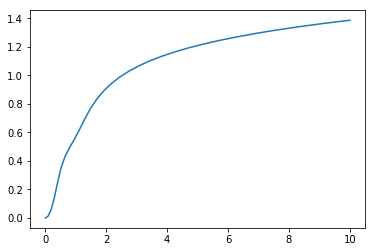

In [20]:
ssQ2_func = interp1d(s_arr,np.log10(s_arr*s_arr*Q2_parsed+1e-30),fill_value='extrapolate')
plt.plot(s_arr,10.0**ssQ2_func(s_arr))

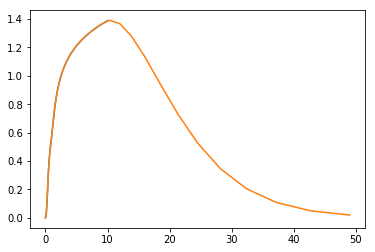

2.2658072640464305e-21


<Figure size 432x288 with 0 Axes>

In [18]:

plt.plot(s_arr,(s_arr**2.)*Q2_parsed)
s_arr_extrap = np.logspace(0,np.log10(50),30) - 1
Q3_extrap = 10**Q2_func(s_arr_extrap)
plt.plot(s_arr_extrap,Q3_extrap*s_arr_extrap**2.)
#plt.yscale('log')
#plt.ylim(-1,1)
#plt.ylim(10**(-5),1)
plt.show()
plt.clf()

print 10**Q1_func(100.0)


In [4]:
Q1_path = "../tables/Q1_2d_a0.5_p0.0_g1.0_np32_ng10000_bhspin1.0.txt"
Q2_path = "../tables/Q2_2d_a0.5_p0.0_g1.0_np32_ng10000_bhspin1.0.txt"
Q3_path = "../tables/Q3_2d_a0.5_p0.0_g1.0_np32_ng10000_bhspin1.0.txt"
Q1_parsed = load_Q(Q1_path,dim="2d")
Q2_parsed = load_Q(Q2_path,dim="2d")
Q3_parsed = load_Q(Q3_path,dim="2d")

In [8]:
npts = 32
print np.min(Q2_parsed),np.max(Q2_parsed)
dQ1_dpsi_parsed = np.zeros((npts,npts))
for i in range(npts):
    dQ1_dpsi_parsed[i][1:npts-1] = (Q1_parsed[i][2:] - Q1_parsed[i][:npts-2])/(s_arr[2:] - s_arr[:npts-2])
    dQ1_dpsi_parsed[i][0] = 0.0#dQ1_dpsi_parsed[1]
    dQ1_dpsi_parsed[i][npts-1] = dQ1_dpsi_parsed[i][npts-2]


0.0 2.783497775466309


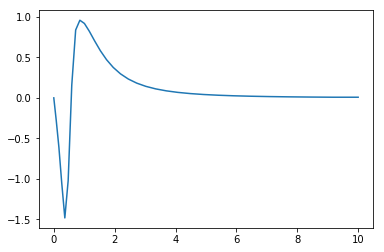

In [9]:
smax = 10.
rmax = 100.
npts = 32
s_arr = np.logspace(0,np.log10(smax+1),npts) - 1
r_arr = np.logspace(0,np.log10(rmax),npts)

#for rr in range(npts):
plt.plot(s_arr,dQ1_dpsi_parsed[0])

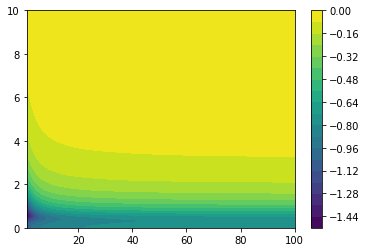

In [11]:
R, S = np.meshgrid(r_arr,s_arr,indexing='ij')
plt.contourf?
plt.contourf(R,S,Q1_parsed,20)
plt.colorbar()

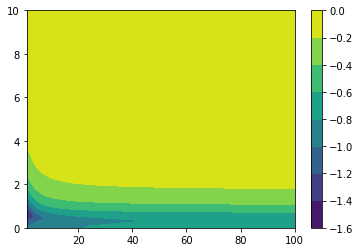

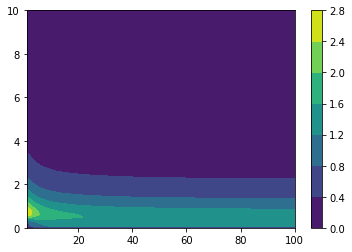

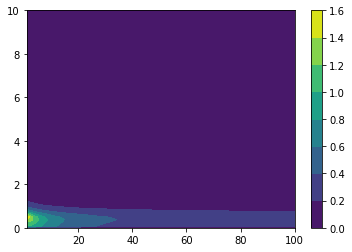

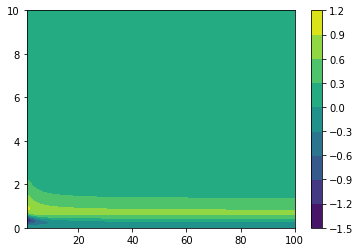

<Figure size 432x288 with 0 Axes>

In [12]:
def interp_1d( x, y, new_x, nx):
    ind = nx-1
    for i in range(nx):
        if (new_x == x[i]):
            new_y = y[i]
            return new_y
        if (new_x < x[i]):
            ind = i
            break
    new_y = (y[ind-1]*(x[ind]-new_x) + y[ind]*(new_x - x[ind-1]))/(x[ind]-x[ind-1])
    return new_y


def interp_2d(x, y, z, new_x, new_y, n):

    # get x1,x2,y1,y2 which define the "box" around our x,y
    # if x, y is exactly an x,y value from our array, we can skip the rest and do a 1d interpolation
    xind = -1
    yind = -1
    for i in range(n):
        if (new_x == x[i]):
            return interp_1d(y,z[i,:],new_y,n)
        elif (new_x <= x[i]):
            xind = i
            break
    for i in range(n):
        if (new_y == y[i]):
            return interp_1d(x,z[:,i],new_x,n)
        elif (new_y <= y[i]):
            yind = i
            break
    
    # Get z values corresponding to each pair (x_i, y_i) that defines our box
    x1 = x[xind-1]
    x2 = x[xind]
    y1 = y[yind-1]
    y2 = y[yind]
    z22 = z[xind,yind]
    z12 = z[xind-1,yind]
    z21 = z[xind,yind-1]
    z11 = z[xind-1,yind-1]

    # Now apply formula for bilinear interpolation
    return (1./((x2-x1)*(y2-y1)))*(z11*(x2-new_x)*(y2-new_y) + z21*(new_x-x1)*(y2-new_y) + z12*(x2-new_x)*(new_y-y1) + z22*(new_x-x1)*(new_y-y1))

new_npts = 31
new_s_arr = np.logspace(0,np.log10(smax+1),new_npts) - 1
new_r_arr = np.logspace(0,np.log10(rmax),new_npts)
new_R, new_S = np.meshgrid(new_r_arr,new_s_arr,indexing='ij')


QQ = np.zeros(np.shape(new_R))
for rr in range(new_npts):
    for ss in range(new_npts):
        QQ[rr][ss] = interp_2d(r_arr,s_arr,Q1_parsed,new_r_arr[rr],new_s_arr[ss],new_npts)
plt.contourf(new_R,new_S,QQ)
plt.colorbar()
plt.show()
plt.clf()
QQ = np.zeros(np.shape(new_R))
for rr in range(new_npts):
    for ss in range(new_npts):
        QQ[rr][ss] = interp_2d(r_arr,s_arr,Q2_parsed,new_r_arr[rr],new_s_arr[ss],new_npts)
plt.contourf(new_R,new_S,QQ)
plt.colorbar()
plt.show()
plt.clf()
QQ = np.zeros(np.shape(new_R))
for rr in range(new_npts):
    for ss in range(new_npts):
        QQ[rr][ss] = interp_2d(r_arr,s_arr,Q3_parsed,new_r_arr[rr],new_s_arr[ss],new_npts)
plt.contourf(new_R,new_S,QQ)
plt.colorbar()
plt.show()
plt.clf()
QQ = np.zeros(np.shape(new_R))
for rr in range(new_npts):
    for ss in range(new_npts):
        QQ[rr][ss] = interp_2d(r_arr,s_arr,dQ1_dpsi_parsed,new_r_arr[rr],new_s_arr[ss],new_npts)
plt.contourf(new_R,new_S,QQ)
plt.colorbar()
plt.show()
plt.clf()


In [ ]:
        else: huh